In [2]:
#数据读取
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.data.csv',index_col=0)
df.head()

,plas,pres,skin,test,mass,pedi,age,class
preg,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

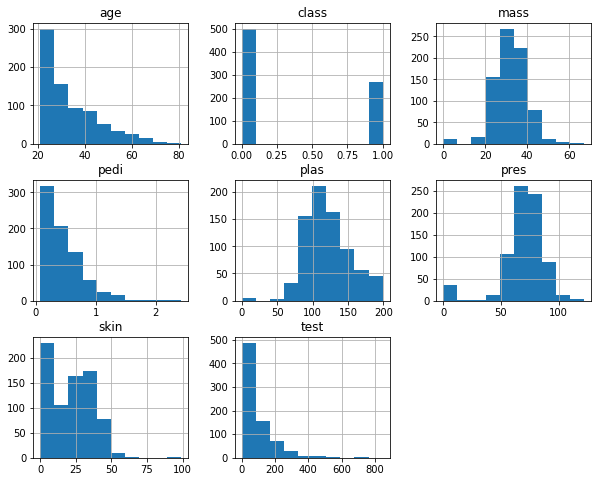

In [6]:
#分析
import matplotlib.pyplot as plt 
df.hist(figsize=(10,8)) 
plt.show()

In [7]:
X = df.loc[:,df.columns!='class']
y = df.loc[:,df.columns=='class']

In [8]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y) 
X_tr.shape,X_ts.shape

((576, 7), (192, 7))

In [9]:
#分别使用决策树模型与Bagging模型建模
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=dtc,n_estimators=100)  #Bagging模型
dtc = dtc.fit(X_tr,y_tr)
bgc = bgc.fit(X_tr,y_tr.values.ravel())

In [10]:
y_dtc_pred = dtc.predict(X_ts)
y_bgc_pred = bgc.predict(X_ts)
from sklearn.metrics import f1_score,accuracy_score 
print('f1-score:%.4f'%f1_score(y_ts,y_dtc_pred)) 
print('accuracy:%.4f \n'%accuracy_score(y_ts,y_dtc_pred)) 
print('f1-score:%.4f'%f1_score(y_ts,y_bgc_pred)) 
print('accuracy:%.4f'%accuracy_score(y_ts,y_bgc_pred))

f1-score:0.6723
accuracy:0.7969 

f1-score:0.6111
accuracy:0.7812


In [11]:
from sklearn.model_selection import cross_val_score 
cross_val_score(dtc,X,y,scoring='f1',cv=10).mean()

0.5854840670065133

In [12]:
cross_val_score(bgc,X,y.values.ravel(),scoring='f1',cv=10).mean()

0.622274035633062

# 结论：Bagging模型比决策树模型更加准确